<a href="https://colab.research.google.com/github/AlanAmaro13/Introduction_NLP/blob/main/NLP_Specialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Procesing (NLP)

This DeepLearning Specialization has the main purpose to create Artificial Inteligence Models able to use language, generate text with context, to have the ability to detect good or bad sentiments in tweets, etc.

# Classification and Vector Spaces

## First week: Logistic Regression

This first week has the main purpose to learn how to represente text as a vector and build a classifier, we'll be doing this using logistic regresion to get a good base to start. So, a first question could be, how can I convert text to a mathematical base?

### Vocabulary and Features Extraction

**Vocabulary and features extraction:** So, you have a text and what can you do with it?

It order to the model to learn from this text it's necessary to extract unique values, this is, the words. And how can you do that? First we must create a vocabulary.

What's a vocabulary? A vocabulary is a set contaning all the words (not repeated words) presents in your text, so, each word in your text can be represented as a linear combination of your vocabulary. The dimension of this sets is denoted as V, and corresponds to the total amount of words in your text. Note that you'll end with a sparse matrix, this is, a matrix containig a lot of zeros, so the learning will slow down.


* The process to extract uniquec values is denote as Features Extraction.

After this, we're gonna be using Logistic regression, if you're totally new using AI, you may want to check this notebook first: [Introduction to Keras 3 - AI](https://github.com/AlanAmaro13/Introduction_to_Keras_3).


As summary, you have a set of values X,Y and you want to make a good function in order to predict Y values, so you use AI and you get yourself a first model that predicts Y' values. How good is your model? You can use the difference between Y-Y' to get an idea about good it is, this is call Cost Function.


A good model is a model that reduces the cost function.


### Positive and Negative Frequencies

How many times does a *bad word* appears in a *Bad tweet*? In order to classify the tweets acording to the words in the text we get the frequency of good and bad words. To do this, we define a function able to count how many times a word is repeated in good and a in bad tweets and later we set a dictionary containing the Good and Bad frequency.

* This is denoted as a count

And why do we want to this? Well, in the before topic we end up with a sparse matrix to represent a tweet, in this case we'll end with a 3D vector! This vector contains the bias, *the sum of good frequencies*, and the *sum of bad frequencies*, so your model doesn't have to learn a lot of parameters, only 3!


So, you have a
* freqs: dictionary mapping from words to frequency.

And with this you can denote an arbitrary tweet *m* as:
$$x_{m} = [1, \sum_{m}freqs_{G}(w,1), \sum_{n}freqs_{B}(w,1)] $$
So, you get the sum of good frequencies from the word in your tweet, and do the same thing for the bad words. **Note that you only sum one time the word**. After this, you'd have a vector in the next from:
$$[1,8,11] $$
Where $1$ denotes a Bias, $8$ denotes good frequency and $11$ denotes bad frequency.

So, let's do it. First we must create a Vocabulary, and start counting!

### Preprocessing

Preprocessing is the action to remove non-desire characteres in your text, such as punctuation marks, URLs, tags, etc. Also, this process converts all words to their lower case.  

* Remove all words to no add significant meaning (Stop Words and Punctuation)
* Remove handles and URLs
* NOTE: Sometimes punctuation add significat meaning to your text

**Stemming and lowercasing**: This action takes any verb to the main form, for example, *tunning* to *tun*.

Lowercasing refers to convert any word to its lowercase

And the main steps to do text processing are:
* Remove handles and URLs
* Tokenize: Converts strings into words
* Remove stop words (and, is, a, on, ...)
* Stemming - Converts any word to its steam: *dancer to danc*
* Lowercasing

### A first code!

So, you may be wondering how are we do all this stuff? First, we're gonna review a Python Library: NLTK. This package contains all the functions needed to start doing NLP.

This library contains functions to handling, collecting and processing Twitter data. So, the first steps is installing!

In [ ]:
! pip install nltk

In [ ]:
# Import the libraries used:

import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import pandas as pd

Which DataSet are we gonna be using? Twitter samples dataset contains over 10k tweets: 5k good tweets and 5k bad tweets, so it's a good start point 'cause you have a balance data.

In [ ]:
nltk.download('twitter_samples')  # Download the dataset

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
# Separate positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
print(positive_tweets)

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI", '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing app Katam

As you can notice, each set contains strings elements refers to a tweet

In [ ]:
print('Number of positive tweets: ', len(positive_tweets))
print('Number of negative tweets: ', len(negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(positive_tweets))
print('The type of a tweet entry is: ', type(negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


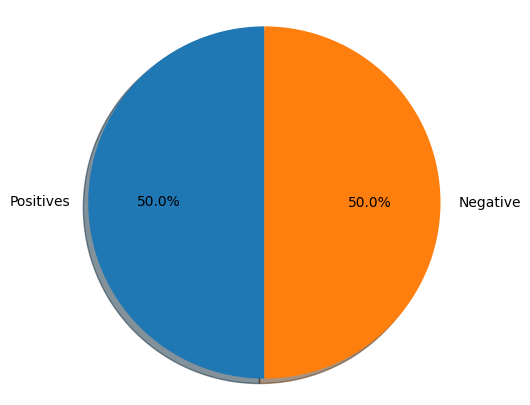

In [ ]:
#  Other way to see the information is using a Pie Chart
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(positive_tweets), len(negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
# We can also review some tweets:
# print positive in greeen
print('\033[92m' + positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + negative_tweets[random.randint(0,5000)])

@paulbeaton720 Looking good! Let us know what you think when you've tried them :)
i miss them already :(


#### Preprocessing again

As you already know, preprocessing removes all no-desiere characters and words, so in this section we focus in how to do it

In [ ]:
# We're gonna do this just for one tweet
tweet = positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
# In order to remove StopWords, we're gonna be using the vocabulary
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# And we'll use the next libraries:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [ ]:
# Remove URLs, Twitter marks and styles:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [ ]:
# Tokenize the tweet:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [ ]:
# We're gonna remove the stops words and puntuaction marks in English

#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [ ]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [ ]:
# Stemming
# We use the PorterStemmer module which uses the Porter Stemming Algorithm

print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


#### Feature Extraction

Once we've processed our data, the next step is starting to extract features using a vocabulary, a frequency function and a matrix creation function.

1) Preprocessing - Already done

2) Feature Extraction using a frequency dictionary

3) Matrix Form: $m$ rows and $3$ columns

In [ ]:
# Building and Visualizing word frequencies:
txt  ='''
In this section we create a frequencies function
able to count how many times a word appears in the
bad and good section.
'''
import numpy as np

# In this case, we're gonna be using two
# functions: process_tweet() and
# bulid_freqs()

# Create the list with all tweets:
tweets = positive_tweets + negative_tweets

# Separates the values
labels = np.append(np.ones(len(positive_tweets)), np.zeros(len(negative_tweets)) )


In [ ]:
# Process_tweet function:

def process_tweet(tweet):
  '''
  Process tweet:
  Input: Recieves a tweet

  Output: Return a list with each processed tweet.
  '''

  p_tweet = re.sub(r'^RT[\s]+', '', tweet) # Remove the world RT
  p_tweet = re.sub(r'https?://[^\s\n\r]+', '', p_tweet) # Remove hyperlinks
  p_tweet = re.sub(r'#', '', p_tweet) # Remove hash symbol

  # Tokenizer use
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

  tweet_tokens = tokenizer.tokenize(p_tweet)

  # Remove stop words
  tweets_clean = []

  for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

  # Stemming:

  stemmer = PorterStemmer()
  tweets_stem = []

  for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

  return tweets_stem

# We're gonna use it

print(process_tweet(positive_tweets[2277]))

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [ ]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency: ('shame', 0) : 19
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs



In [ ]:
# So ce can obtain our frequency dictionary

freqs_dict = build_freqs(tweets, labels)

print(freqs_dict)

{('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, (':)', 1.0): 3691, ('hey', 1.0): 77, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 99, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 643, ('listen', 1.0): 17, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 6, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 246, ('one', 1.0): 131, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 17, ('like', 1.0): 233, ('keep', 1.0): 68, ('love', 1.0): 401, ('custom', 1.0): 4, ('wait', 1.0): 70, ('long',

In [ ]:
# We can plot this using
data = []

for word in freqs_dict.keys():
  word = word[0]
  pos, neg = 0, 0

  if (word, 1.0) in freqs_dict:
    pos = freqs_dict[(word, 1.0)]

  if (word, 0.0) in freqs_dict:
    neg = freqs_dict[(word, 0.0)]

  data.append([word, pos, neg])

data



[['followfriday', 25, 0],
 ['top', 32, 6],
 ['engag', 7, 0],
 ['member', 16, 6],
 ['commun', 33, 2],
 ['week', 83, 56],
 [':)', 3691, 2],
 ['hey', 77, 26],
 ['jame', 7, 4],
 ['odd', 2, 3],
 [':/', 5, 11],
 ['pleas', 99, 275],
 ['call', 37, 29],
 ['contact', 7, 7],
 ['centr', 2, 2],
 ['02392441234', 1, 0],
 ['abl', 8, 23],
 ['assist', 1, 0],
 ['mani', 33, 29],
 ['thank', 643, 107],
 ['listen', 17, 18],
 ['last', 47, 73],
 ['night', 68, 46],
 ['bleed', 2, 1],
 ['amaz', 51, 16],
 ['track', 5, 3],
 ['scotland', 2, 2],
 ['congrat', 21, 2],
 ['yeaaah', 1, 0],
 ['yipppi', 1, 0],
 ['accnt', 2, 0],
 ['verifi', 2, 0],
 ['rqst', 1, 0],
 ['succeed', 1, 0],
 ['got', 69, 104],
 ['blue', 9, 5],
 ['tick', 1, 0],
 ['mark', 1, 2],
 ['fb', 6, 7],
 ['profil', 2, 1],
 ['15', 5, 10],
 ['day', 246, 150],
 ['one', 131, 149],
 ['irresist', 2, 0],
 ['flipkartfashionfriday', 17, 0],
 ['like', 233, 228],
 ['keep', 68, 34],
 ['love', 401, 152],
 ['custom', 4, 1],
 ['wait', 70, 43],
 ['long', 36, 38],
 ['hope', 143

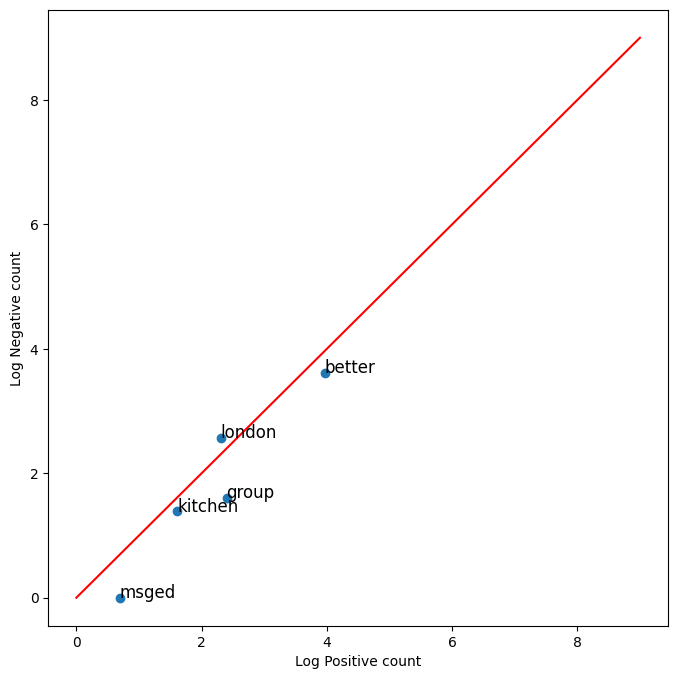

In [ ]:
# And we can plot the data using
import random


fig, ax = plt.subplots(figsize = (8, 8))

data_1 = random.sample(data, 5)

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data_1])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data_1])

# Plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data_1)):
    ax.annotate(data_1[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

#### Logistic Regression

##### Sigmoid Function

This function regrets a probability between 0 and 1, and its mathematical form corresponds to:
$$h(x^{(i)}, \theta ) = \frac{1}{1 - e^{-\theta^{T} x^{(i)}}} $$
If the probabiblity is greather than 0.5 we define it as a positive probability, and in the other case with the probability less than 0.5 we define it as a negative probability.

So, in this case we have a matrix of $m \times 3$, where we're gonna need 3 thetas, this done in order to match the values of our X set to the Y set.

This class of learning is label _Supervised learning_, let say you have a X set, you define your $h(x, \theta)$ function and start giving it values, so you obtained $Y'$ values.

In order to macth the correct values $Y$ you must update your theta parameters, and to do this we use tha gradient descent algorithm. After many iterations you'll end up with a good set of parameteres theta, so your prediction $Y'$ should be really close to $Y$.

As the logistic fuction only return a number between 0 and 1, you must stablish a threshold, this is like a limit, and in this case is set to 0.5. If the probability is greater or equal to 0.5 then the value is set to 1, in contrary case the value is set to 0.

This allow us to confront classification tasks.

##### Cost Function

We consider the next cost function:
$$J(\theta) = - \frac{1}{m} \sum_{i = 1}^{m} [y^{(i)} \log{ h(x^{i} , \theta)} + (1-y^{(i)}) \log{(1 - h(x^{i} , \theta))} ]    $$
Note that this function is relevante for values 0 and 1

### Assigment

The corresponds assigment for this week is online [here](https://drive.google.com/file/d/1nsh60tYEiEohGMXmwRJ8b8_EFrzc5bp5/view?usp=drive_link)

## Second Week: Naive Bayes

### Probabily and Bayes'Rule

Probability is fundamental in the context of NLP, this allow us to predict values acording to how frecuent they are. For example, in certain cases words such as Happy can be associated with positive or negative sentiments, we can get the probability for Happy to be a positive or negative just counting the number of times the word has been asociated and dividing over the total corpus.

* Let's say you wanna calculate the probability of a tweet being positive, in this case is just the number of positive tweets divide it over the total corpus. And the probability of a tweet being negative will be the complementary!

* _To calculate a probability of certain event happening, you take the count of that specific event and you divide it by the sum of all events_





### Bayes' Rule & Conditional Probabilities

* _Conditional probabilities help us reduce the sample search space_

In this case, let's gonna considerar the probaiblilty of B given A happened. This means, let's say that B has already happend and this influences the probability of A for happen.

Also, this can be understood as looking at the elements of A, get the probability for B belongs to A.
$$P(A|B) = \frac{P(A \cap B )}{P(B)} $$
In this case, we say that B has already happened, what's are the odds to get A? The probability corresponds to the probability to get A in B, divide by the probabitily to get B.

Note that we can get the complementary case:
$$P(B|A) = \frac{P(B \cap A)}{P(A)} $$
From this we can get the **Bayes' Rule**:
$$P(A|B) = P(B|A) * \frac{P(A)}{P(B)} $$

### Naive Bayes

Naive Bayes is a way to predict probabilities between two objects that are merely related. In this case, we're gonna use it for sentiment classification.

In the chapter before we implement a vocabulary and a frequency dictionary, so we can get how many times a word is related to a good and a negative sentiment. In this case we're gonna use Naive Bayes in the next way:
* First, we must get the frequency for each word in good and bad sentiments, later we get the probability dividing each frequency over the total
* The next step is, using the probabiblities obtained, use the Naive Bayes Binarie Classification equation:
$$\Pi_{i=1}^{m} \frac{P(w_{i}|Pos)}{P(w_{i}|Neg)} $$
In case the value is greater that one, the tweet contains a good sentiment. Otherwise is a negative sentiment.

### Laplacian Smoothing

This is a very useful technique for avoiding probabilties going to zero. It is define as:

$$P(I|Class) = \frac{Freqs(I|Class) + 1}{N_{Class} + V_{Class}}$$

In this cases, let's take a word I belonging to a certain class, in this cases the probability correspondes to the classical frequency over the $N_{Class}$, but it was added it the numberator a 1, and in the denominator a $V_{class}$, in this cases, it denotates the number of unique words in the class, not in the vocabulary.

* Class corresponds to positive or negative

### Log Likelihood

As before, we have our vocabulary with their frequencies, we get the probability using the Laplacian Smoothing. After this process we end up with two columns.

The first one containing all the good probabilities and the other one containing all the bad probabilities, from this we can get the ratio, it's define as:
$$ratio(w_{i}) = \frac{P(w_{i}|Pos)}{P(w_{i}|Neg)} $$
From this, we define a word as neutral if its radio equals one, if it's greater that one it's positive, or if it's lower that one then is negative.





* If we have an unbalaced dataset, the correct formula in order to make predictions corresponds to:
$$\frac{P(Pos)}{P(Neg)}*  \Pi_{i=1}^{m} \frac{P(w_{i}|Pos)}{P(w_{i}|Neg)}  $$
Where the second term is usually name as *Likelihood*. This expression is done for unbalaced datasets, when the dataset is balance then the first term or *prior ratio* is just one.



* You can notice from this that we're gonna be dealing with a lot of multiplications, in order to avoid this, we use logarithms, so, the expressions is more like:

$$\log \frac{ P(Pos) }{ P(Neg) } + \sum_{i=1}^{n} \log \frac{P(w_{i}|Pos) }{ P(w_{i}|Neg) }$$

Note from this that the neutral value now became zero. And from this we define Lambda as:
$$\lambda(w) = \log \frac{P(w|Pos)}{P(w|Neg)} $$
Now we can start making predictions, given a tweet we already know the lambda values for each word in the tweet, so we can sum all the lambdas and get the prediction!

If the sum is greater than zero, then is positive, and if it's lower than zero, then is negative.


### Training Naive Bayes

In order to train a model, the following steps are required:


1.   Collect an anotate corpus (separating sets)
2.   Preprocess
3.   Creating a vocabulary and a frequency dictionary
4.   Get conditional probability using Laplacian smoothing
6.   Get the lambda core for each word
7.   Estimation of the logprior
8.   Start making predictions using Binary Classification.




### Visualizing Navie Bayes

In order to visualize Navie Bayes we often use Confidence Ellipses. A confidence Ellipse is a way to visualize a 2D random variable, this way summarize the infomation of the dataset to only four parameters: Center, Height, Width and Angle.

The center corresponds to th mean of the attributes, the angle is related to the covariance and the height and with related to the variance.



The parameter __n_std__ stands for the number of standard deviations bounded by the ellipse. Remember that for normal random distributions:

* About 68% of the area under the curve falls within 1 standard deviation around the mean.
* About 95% of the area under the curve falls within 2 standard deviations around the mean.
* About 99.7% of the area under the curve falls within 3 standard deviations around the mean.

### Testing Naive Bayes

For testing the model in unseen tweets, the tweet must be preprocess. In the case a word is not in the vocabulary, we will consider the word as neutral (0). For each prediction we must add the logprior.

So, for each tweet we must:


1.   Preproccess the tweet
2.   Get the lambda for each word in the vocabulary
3.   Get the prior-log
4.   Get the score for each tweet, this means, add all the corresponding lambdas.
5.   If the score is greater than zero, then corresponds to a good sentimente, in other case, it corresponds to a bad sentiment.
6.  Get the test set and compare them.
7.  Get the accuraccy.





### Applications of Naive Bayes

Some applications corresponds to:


*   Author identification
*   Spam filtering
*   Filtering between relevant or irrelevant documents
*   Word disambiguation
*   And, of course, sentiment analysis!

The Naive Bayes method is really fast and robust!






### Naive Bayes Assumptions:


So, this is the best model for ever right? Well, that's not really the case. In the Naive Bayes model we did certain assumptions, for example:

*   The words in a tweet are NOT related: This means that if a tweet says: It's very cold in the..., your model can predic with the same probability the word summer or winter. And we both know that's not really the case.

*   Balance Dataset: The model will work perfectly if the words are not related and also if we're giving to the model the real words we often used, but since we're taking the words from tweeter, there are not bad words, then our model doesn't predict exactly well. And also, the number of good tweet are greater that the number of negative tweets.

### Error Analysis

Naive Bayes is not the wonderful method, but it's incredible useful. So, let's talk about somecases in wich we'll find errors:

*   Puntuacion marks: If we remove puntuation as :c or !, this can led to some miscomprehension about the tweet.

*   Removing neutral words as not or this. In certain cases the word *not* can apport a lot of information about the sentiment.

*   Also certain errors can provide from the word order.

*   And finally, adversarial attacks, this mean sarcasm, Irony and Euphemisms.

All this errors appears in when our model misclassified a tweet.

### Assigment

The corresponds assigment for this week can be found [here](https://drive.google.com/file/d/16sm39ou3m5sZhkktgfcbay7Q6Guf1o68/view?usp=drive_link)


## Third Week: Vector Space Models

The main concept of this week is to learn how to represent words as vectors, and find relationships between them using Euclidian distance and cosine similarity.

### Vector Space Models

This type of representations allow us to capture similarity between words or documents, so we are now able to summarize, create chatbots, answering questions, and so on. This is done by capturing what type of information these vectos encode.

This models are very good for:

*   Information Extraction
*   Machine Translation
*   Chatbots programming

### Word by Word and Word by Doc

So, what are we saying with Word by Word? Let's consider the next sentence:

"I really love music, my love for music is greather than anything else"

From this sentence, we can get a *Co-ocurrence matrix* based on _how many times a word is repeated within a certain distance k_. For example, in the last sentence if we set a distance of k = 2, we can get:

*   (love, music ) = 2
*   (love, greather) = 0

This is because love and music are repeated two times with a distance less or equal to two words. In the opposite case, there are zero times that the word love and greather are repeated inside a distance k = 2. In this way we can get a vector with dimension n = dim(vocabulary)



In the other case, we count how many times a word appears in a specific document category. For example, the word *information* can appear 2k in economy, 4k in sciencie, and 9k in programming.

Following this way, we can get a vector representation, where the distances between vectors implies their similarities.

### Linear algebra with Numpy

If you're looking how to make linear algebra using Numpy, go to check the next [notebook!](https://drive.google.com/file/d/1l1k6kLz-sKp1KBdj3TC9D4dgdtBOp2wx/view?usp=drive_link)

### Euclidian Distance

One way to get how similar two words are is using the euclidian distance, if we have two vectores $x = (x_{1}, x_{2}),y = (y_{1}, y_{2})$ we can get the distance between them using the following formula:
$$d(x,y) = \sqrt{ \sum_{i=1}^{n} (y_{i} - x_{i})^{2} } $$
And in Python we can do this using the Numpy module and the function:


```
d = np.linalg.norm(y-x)
```




### Cosine similary

As you may notice, taking the euclidian distance is not always the best way to get similarity between two vectors, this is 'cause some vectores can be significant greater than other. In order to solve this, we can use the angle between two vectors.

If the angle is small, then the vectors are more similar, and then the cosine tends to 1. In the opposite case, if the angles is almost 90 degrees, then the cosine tends to zero. The expression to get the cosine corresponds to:
$$ x \cdot y = |x| |y| \cos \theta $$
So:
$$ \cos \theta = \frac{x\cdot y}{ |x||y|} $$

We shall consider total similarity when $\cos \theta = 1$ and total disimilarity when $\cos \theta = 0$

### Manipulating words in Vector Spaces

Let's consider four vectors:

*   USA -> $(u_{1}, u_{2})$
*   Washington DC -> $(w_{1}, w_{2})$

From this, we can get the vector $\vec{a}$ from USA to Washinton DC. And if we know the Russian vector $(r_{1}, r_{2})$, we can easily get the Moscu vector, this is done adding the vector $a$ to the russian vector.

From this, we may not get the correct Moscu vector, but we'll get a vector very close, the next step is taking the closest vector to the adding one, in a process similar to clustering.

* To get the more similar vector we used cosine similarity

* We can even say that the vector difference between France and Paris represents the concept of Capital

* A whole sentence can be represented as a vector by summing all the word vectors that conform to the sentence.

### Principal Componet Analysis (PCA)

In order to represents higher dimension vectors in two dimensions, we use the principal component analysis algorithm, this method allow us to reduce the n-dimension of a vector to only two dimensions.

* This is a topic from dimensionality reduction

* Corresponds to unsupervised learning

How it works? First we get uncorrelated features and then we take the proyection on to one axis.

How we are gonna do that? First we must get uncorrelated features, to get this we're gonna get the eigenvectors and eigenvalues from the Co-variance matrix, this is becauses:

1.   Eigenvector: Uncorrelated fatures in our data

2.   Eigenvalue: The amount of information retained by each feature.

In order to get the uncorrelated features we must normalize the data using:
$$x_{i} = \frac{x_{i} - \mu_{x_{i}}}{\sigma_{xi}} $$
Where $\mu$ represents mean, and $\sigma$ represents standar desviation.

Then we get the Co-variance matrix, and on this we perfom *Singular value decompostion SVD*. This will give us three matrices, one with the eigenvectores in columns and the second containing the eigenvalues in the diagonal.

Finally, we proyect our data, to do this we take the dot product between the data and the eigenvector matrix to a n number representing how many dimensios are desired. From this resultan vector, we get the Percentage of Retained Variance:
$$ \frac{ \sum_{i=0}^{l} S_{ii} }{ \sum_{j=0}^{d} S_{jj} } $$
Where $S$ represents the eigenvalues diagonal.

* The eigenvectors and eigenvalues must be organize in descending order acording to the eigenvalues.


Principal Component Anaylsis is a statistical techinque that uses orthogonal transformations to map a set of variables into a set of linearly uncorrelated variables, denomited as Principal Components. To get this values we used SVD, where the resultant eigenvectors correspond to a rotational matrix.



If we're looking for use PCA in Python, we can use the library ScienceKit and the function PCA:



```
pca = PCA(n_componets = 2) # Final Dim
pcaTr = pca.fit(data)
rotatedData = pcaTr.transform(data)
```

In this case, the function fit will get the rotation matrix, and the transform function will apply the rotation matrix into our data. From this, we can get the eigenvectors and eigenvalues using

```
pcaTr.components_
pcaTr.explained_variance_
```



Before finish this topic, I want to share with you fundamental concepts, if you have a matrix of (n,m), where $n$ is the vector index and m its characteristics, then :

1.   When getting the mean, the mean must be for each COLUMNS, this is 'cause the caracterists are in each column and we must the mean on that ones.

### Numpy resources



The following Numpy resources are fundamental when doing PCA:

*   [Covariance Matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)
*   [Mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
*   [Eigenvalues and eigenvectors](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)

### Assigment

The correspondg assigment for this week can be found [here](https://drive.google.com/file/d/1_LBn95o-RknD12sbvAy1tojW88daWIE9/view?usp=drive_link)

## Four Week: Machine Translation and Document Search

This week is about to learn how to transform word vectors and assign them to subsets using locality sensitive hashing! The aim for this week is to learn how to perform machine translation.

Also, how to implement document search, in resume:

* Transform vector
* K nearest neighbors
* Hash tables
* Divide vector space into regions
* Locality sensitive hashing



### Transforming word vectors

In this week we're looking for develop a first translation machine. In order to do this, first we must find a transformation that takes the word vector in one language and returns the word vector in the other language.

So, if our first set is X and the second is Y, we're looking for a transformation R that:
$$ XR = Y $$


To get this matrix, we start with a random R matrix and minimize the value
$$Loss = |XR - Y|_{F}^{2} $$
We minimize this value by taking the derivate:
$$d_{R} Loss = \frac{2}{m} (X^{T}(XR- Y)) $$
$m$ denote the rows. And apply it the gradient descent algorithm.
$$ R = R - \alpha *  d_{R} Loss $$
* In this case, note that we define the norm of a matrix using the Frobenius norm: Take the square root of the sum of squared elements. In Python this looks like:


```
# A is a matrix
A_squared = np.square(A)
A_Frobenious = np.sqrt(np.sum(A_squared))
```



**Some tips about rotation matrixes:** A rotation matrix is define as:
$$ R={\begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \end{bmatrix}} $$
This take the angle (in radians) and allow us to rotate vector in a counterclock direction according to:
$$v_{n} = R \cdot v_{n}^{T} $$
Note that if our vector is an row vector, then we must take the transpose vector.

* The rotation over a vector doesn't change its norm.
* The norm of matrix rotation is always $\sqrt{2}$

### K-nearest neighbors

In order to find the more similar vector we can iterate over the whole vector space, but this will be time and resources consuming. To solve this, we implement *hash tables!*

#### Hash tables and hash functions

When we have a list of items and we're looking to organize them, we can separate them into buckets. So, hashing is the same process, we assing numbers to a hash (very similar to an index).

The function that assing a vector to a hash value is denoted as Hash Function(vector).

If we have a collection of numbers, we can assign them a hashing number using the module in this way:
$$H(n) = \mod(n, n_{b}) $$
Where $n_{b}$ is the amout of buckets. So, with this idea we can create a table containing the hash number and the values assing to it.

And if we're looking for a Python Implementation for a hash table:

```python
def basic_hash_table(value_l, n_buckets):
  
  def hash_function(value, n_buckets):
    return int(value) % n_buckets

  hash_table = {i:[] for i in range(n_buckets)}

  for value in value_l:
    hash_value = hash_fuction(value, n_buckets)
    hash_table[hash_value].append(value)

  return hash_table

```

* Note that a hash function takes data of arbitrary size and maps it to a fixed value.



#### Locality sensitive hashing

As we're looking for a way to agroup vectors who are close to each other, we're gonna be implementing the Locality sensitive hashing method. This method allows you to hash similar inputs into the same bucket with high probability. How can we divide a vector space into regions and say which vectors are in each side?

We can, in fact, divide a vector space using planes, so we can say if a vector is above, under or over the plane. To define a plane we often use a vector perpendicular to that plane, so, we can calculate the dot product between the normal vector to the plane and any vector.

The result will be positive if the vector is in the same direction as the normal, negative if it is in the opposite direction and zero if the vector is on the plane.

* The dot product is taking the projection of a vector over the normal, if it's pointing in the same direction is positive, in the opposite direction is negative, or if it's perpendicular then is zero.

So, we can define the next function:
```python
def side_of_plane(P, v):
  dot = np.dot(P,v.T)
  sign = np.sign(dot)
  scalar = np.asscalar(sign)
  return scalar
```

And you may be wondering, how we combine all this with multiple planes? For each plane we define the next rule:
* Given an j-plane, if the dot product between the normal vector to the plane and any vector if greater or equal than zero, then we assing the number 1. If it's lower than zero, then we assing it the number 0.
* For each plane we compute the next hash:
$$hash = \sum_{i=0}^{n} 2^{i} * h_{i} $$
Where $n$ is the total amout of planes, and $h_{i}$ is the associated hash value. And we can get the next function:
```python
def hash_multiple_plane(P_l, v):
  hash_value = 0

  for i, P in enumerate(P_l):
    sign = side_of_plane(P, v)
    hash_i = 1 if sign >= 0 else 0
    hash_value += 2**i * hash_i

  return hash_value
```


### *Important tips*

* Hash tables are data structures that allow indexing data to make lookup tasks more efficient.

* To create random planes we can use:


```python
random_planes_matrix = np.random.normal(
                       size=(num_planes,
                             num_dimensions))
```

* To get the hash when using multiples planes we can use:


```python
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v) # Get the side of planes for P and v
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item() # Get the value inside the matrix cell
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i # sum 2^i * hash_i
        
    return hash_value
```

* The more regions we have, the higher accurate the model will be, but the slower the search will be.



### Approximate Nearest Neighbors

In order to find which vector is more similar to other vector we divide the vector space into multiple subregions. As we can't know which planes are the best to divide the space, we'll create a set of randoms planes.

For each plane, we'll get the side of the vector and compute the hash number. So, this technique is denote as Approximate 'cause we're not looking in the entire space, just in a subregion of it.

* We're loosing precision in order to gain efficiency.

We define de cosine distance as:

$$d_{cos} (u, v) = 1- \cos{(u,v)} $$




### Searching documents

Let's say we got a document composed by 15 words. We can get a vector for each word and then add them to get a vector representing the whole document. Then we can repeat this process for each document and find which documents present similar meaning.

### Assigment


The related assigment can be found [here](https://drive.google.com/file/d/1AsJALIEUkM6RyM6QrTM_SZwHPNYnOzKU/view?usp=drive_link)

## Extra resources

### [Linear Algebra with Numpy!](https://drive.google.com/file/d/1l1k6kLz-sKp1KBdj3TC9D4dgdtBOp2wx/view?usp=drive_link)

### [Words Embeddings](https://drive.google.com/file/d/1eLKXyUeGFUb0THsOpI7iSHUlaTF1cmy_/view?usp=drive_link)